## Supplemental Figure S14: Correlation between SASA 0.5 with ln DMS

# Setup

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

## load data

In [2]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [3]:
df_pdb = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues_pdb.json")
df_pdb = df_pdb.query("r_data_outlier == False").copy()
df_sasa = pd.read_csv(f"{DATA_PATH}/pdb-features/sasa.csv")
df_sasa["m_sequence"] = df_sasa["m_sequence"].apply(lambda x: x.replace("&", "_"))

# merge and remove extra pdb res
df_sasa_merge = pd.merge(
    df_pdb, df_sasa, on=["m_sequence", "r_nuc", "pdb_r_pos", "pdb_path"]
)
df_sasa_merge = df_sasa_merge.query("not ln_r_data.isnull()")

# Plotting

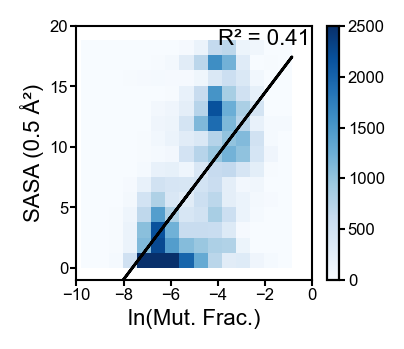

In [4]:
fig, ax = plt.subplots(figsize=(1.90, 1.65), dpi=200)
# scatter_plot_w_regression(df_sasa_merge, ax, "ln_r_data", "sasa_0_5", r2_position=(0.05, 0.95))
heatmap_scatter_plot_w_regression(
    df_sasa_merge, ax, "ln_r_data", "sasa_0_5", bins=15, max_value=2500
)
ax.set_xlabel("ln(Mut. Frac.)", labelpad=2)
ax.set_ylabel(f"SASA (0.5 Å\u00b2)", labelpad=2)
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xticks([-10, -8, -6, -4, -2, 0])
ax.set_ylim([-1, 20])
publication_style_ax(ax)
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s14.png",
    dpi=600,
    bbox_inches="tight",
)